# Satellite Image Classification: Extracting More from Less



In [6]:
base_path = "./dataset/"

In [ ]:
from zipfile import ZipFile

with ZipFile(base_path + "EuroSAT.zip", "r") as zObject:
	zObject.extractall(path=base_path)

In [17]:
import os
import matplotlib.pyplot as plt
from skimage.io import imread, imshow


In [12]:
base_path = base_path + "EuroSAT/"
labels = os.listdir(base_path)

## Assets generation

In [14]:
import math
from PIL import Image

In [30]:
image_files = []
for category in labels:
	category_dir = base_path + category + "/"
	for f in os.listdir(category_dir):
		image_files.append(category_dir + f)

print(f"Total images found: {len(image_files)}")

Total images found: 26862


In [45]:
images = [Image.open(f).resize((4, 4)) for f in image_files]

In [46]:
import random
random.shuffle(images)

Target aspect ratio: 1.78
Final aspect ratio: 1.77
Using 26814 images to fill the collage
Columns: 218, Rows: 123
Final collage size: 872 x 492
Pasting image 0/26814
Pasting image 2000/26814
Pasting image 4000/26814
Pasting image 6000/26814
Pasting image 8000/26814
Pasting image 10000/26814
Pasting image 12000/26814
Pasting image 14000/26814
Pasting image 16000/26814
Pasting image 18000/26814
Pasting image 20000/26814
Pasting image 22000/26814
Pasting image 24000/26814
Pasting image 26000/26814
Collage saved as 'eurosat_collage.jpeg'


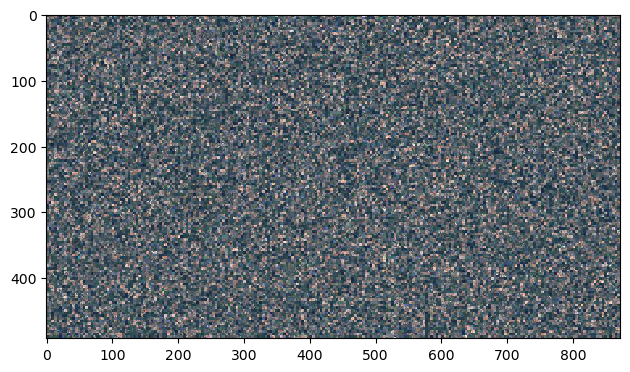

In [ ]:
target_aspect_ratio = 16 / 9

num_images = len(images)
thumb_width, thumb_height = images[0].size

approx_cols = math.sqrt(num_images * target_aspect_ratio)
cols = max(1, int(approx_cols))

rows = math.ceil(num_images / cols)

total_images = rows * cols
if total_images > num_images:
    rows -= 1
    total_images = rows * cols

images = images[:total_images]

collage_width = cols * thumb_width
collage_height = rows * thumb_height
aspect_ratio = collage_width / collage_height

collage_image = Image.new('RGB', (collage_width, collage_height))

for idx, image in enumerate(images):
    x = (idx % cols) * thumb_width
    y = (idx // cols) * thumb_height
    collage_image.paste(image, (x, y))

collage_image.save('eurosat_collage.jpeg')

imshow(imread("eurosat_collage.jpeg"))